# Exploratory Analysis

# Library

In [ ]:
# Mengimport Library yang digunakan

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline
                      


# Dataset InfoProduct

In [ ]:
# Membaca dataset InfoProduct.csv
nRowsRead = 1000

df1 = pd.read_csv('../content/00. InfoProduct.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '00. InfoProduct.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 861 rows and 6 columns


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       861 non-null    object 
 1   Merk           861 non-null    object 
 2   Product        861 non-null    object 
 3   Price          856 non-null    object 
 4   OverallRating  861 non-null    float64
 5   Reviewer       858 non-null    float64
dtypes: float64(2), object(4)
memory usage: 40.5+ KB


In [ ]:
df1.Category.value_counts()

Peeling                    41
Lotion & Emulsion          41
Face Mist                  41
Oil                        41
Facial Wash                40
Wash-Off                   40
Eye Treatment              40
Nose Pack                  40
Day Cream                  40
Makeup Remover             40
Mask Sheet                 40
Night Cream                40
Skin Soothing Treatment    40
Serum & Essence            40
Face Oil                   39
Scrub & Exfoliator         39
Sun Protection             39
Toner                      39
Acne Treatment             39
Sleeping Mask              38
Cream & Lotion             37
Brow & Lash Treatment      27
Name: Category, dtype: int64

In [ ]:
# Menampilkan 10 baris pertama dari dataset

df1.head(10) 

,Category,Merk,Product,Price,OverallRating,Reviewer
0,Night Cream,Hada Labo,Perfect 3D Gel,Rp. 91.000,3.8,978.0
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,Rp. 27.000,4.2,3851.0
2,Night Cream,Wardah,Lightening Night Cream,Rp. 0,3.5,806.0
3,Face Mist,Avene,Thermal Spring Water,Rp. 199.000,4.4,1239.0
4,Night Cream,Wardah,White Secret Night Cream,Rp. 98.000,3.6,572.0
5,Face Mist,Evian,Mineral Water Spray,Rp. 160.000,3.8,979.0
6,Night Cream,Safi,White Expert Replenishing Night Cream,Rp. 103.000,3.6,423.0
7,Face Mist,Nature Republic,Aloe Vera 92% Soothing Gel Mist,Rp. 100.000,4.0,424.0
8,Night Cream,Garnier,Light Complete White Speed Multi-Action Whiten...,Rp. 54.100,3.2,409.0
9,Face Mist,Wardah,C-defense Face Mist,Rp. 36.000,3.7,354.0


In [ ]:
df1.head().T

,0,1,2,3,4
Category,Night Cream,Face Mist,Night Cream,Face Mist,Night Cream
Merk,Hada Labo,PIXY,Wardah,Avene,Wardah
Product,Perfect 3D Gel,Aqua Beauty Protecting Mist,Lightening Night Cream,Thermal Spring Water,White Secret Night Cream
Price,Rp. 91.000,Rp. 27.000,Rp. 0,Rp. 199.000,Rp. 98.000
OverallRating,3.8,4.2,3.5,4.4,3.6
Reviewer,978,3851,806,1239,572


In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,861,22,Peeling,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merk,861,215,Wardah,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,861,797,Milk Cleanser,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,856,320,Rp. 0,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallRating,861,NaN,NaN,NaN,3.91684,0.479105,1.6,3.6,4,4.3,5
Reviewer,858,NaN,NaN,NaN,471.865,824.006,1,80,229.5,473,9312


In [ ]:
# Menampilkan Merk terpopuler

df1['Merk'].value_counts().head(10)

Wardah            46
The Body Shop     43
Garnier           28
Innisfree         25
Pond's            24
Viva Cosmetics    23
Emina             22
Laneige           21
Biore             19
Cosrx             18
Name: Merk, dtype: int64

In [ ]:
# Menampilkan Product terpopuler

df1['Product'].value_counts().head(10)

Milk Cleanser             6
Masquerade Face Mask      5
Real Nature Mask Sheet    5
Pore Pack                 5
7 Days Mask               4
Face Tonic                4
Face Mist                 4
Nose Pore Strip           3
Cleansing Oil             3
Aloe Vera Gel             3
Name: Product, dtype: int64

In [ ]:
df1.groupby('Reviewer').head()

,Category,Merk,Product,Price,OverallRating,Reviewer
0,Night Cream,Hada Labo,Perfect 3D Gel,Rp. 91.000,3.8,978.0
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,Rp. 27.000,4.2,3851.0
2,Night Cream,Wardah,Lightening Night Cream,Rp. 0,3.5,806.0
3,Face Mist,Avene,Thermal Spring Water,Rp. 199.000,4.4,1239.0
4,Night Cream,Wardah,White Secret Night Cream,Rp. 98.000,3.6,572.0
...,...,...,...,...,...,...
856,Toner,Paula's Choice,Skin Perfecting 2% BHA Liquid Exfoliant,Rp. 390.000,4.3,397.0
857,Toner,Cosrx,Natural BHA Skin Returning A-Sol,Rp. 0,3.8,386.0
858,Toner,Ovale,Facial Lotion,Rp. 15.000,2.9,372.0
859,Toner,Cosrx,Centella Water Alcohol-Free Toner,Rp. 157.000,4.0,367.0


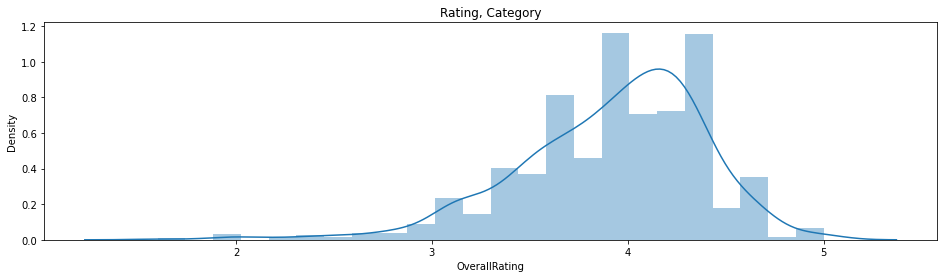

In [ ]:
# Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df1['OverallRating'], ax=ax)
ax.set_title('Rating, Category')
plt.show()

Text(0.5, 1.0, 'Boxplot, Rating for Merk')

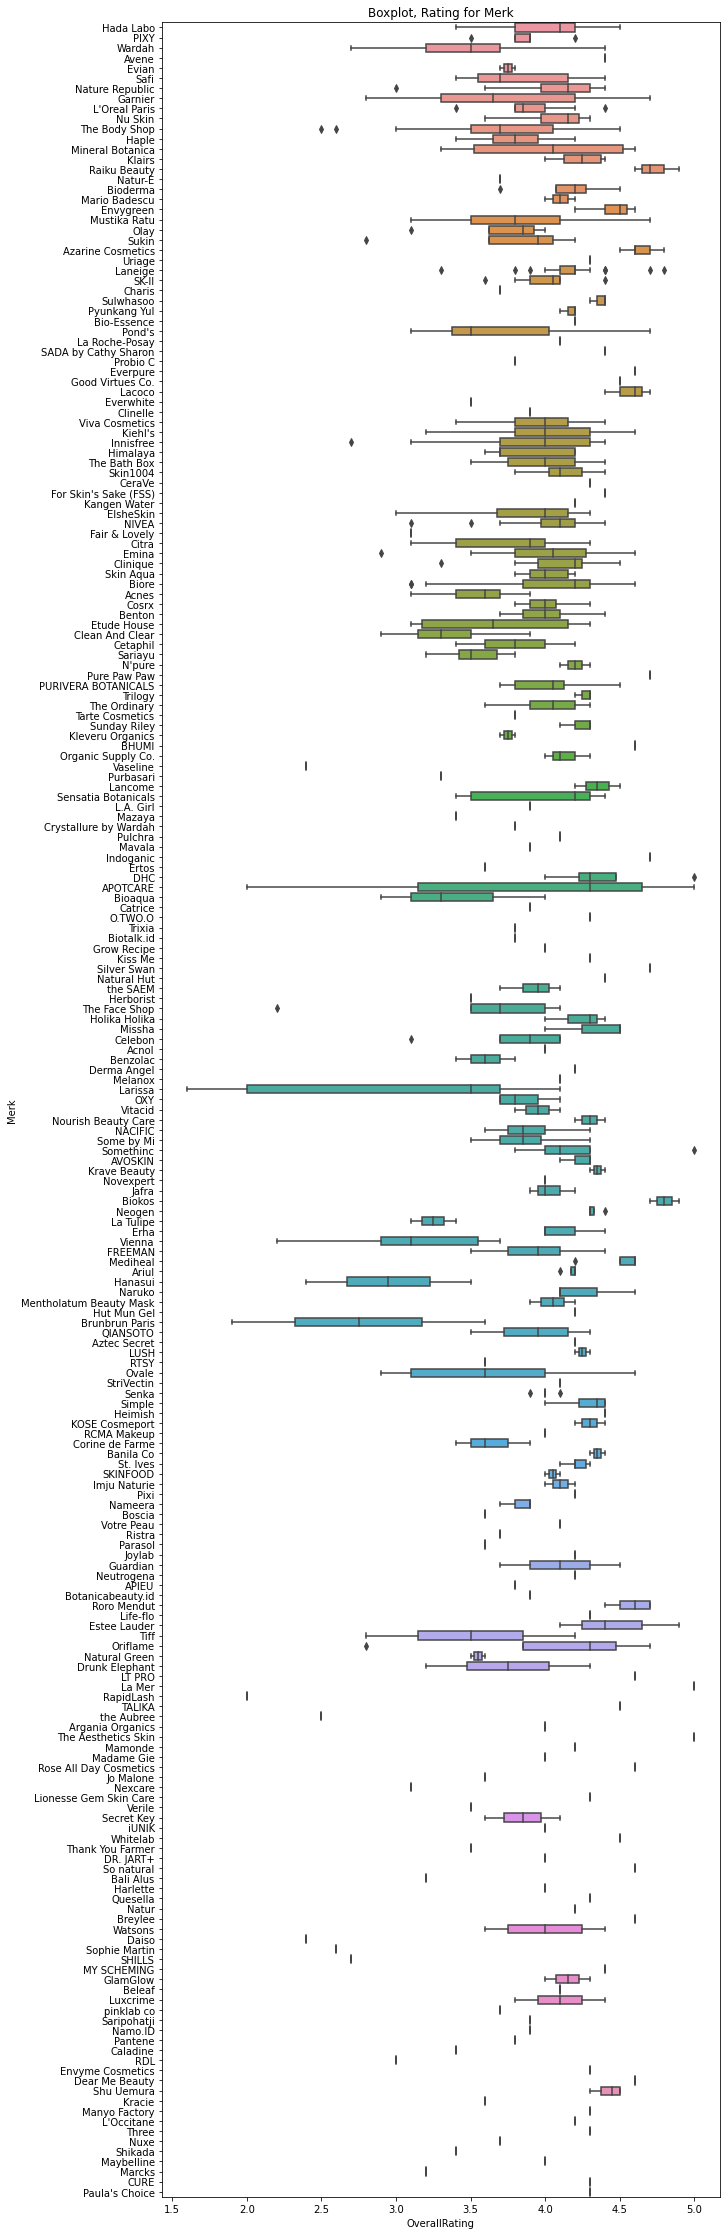

In [ ]:
## Look at boxplot over the countries, even Blends
fig, ax = plt.subplots(figsize=[10, 40])
sns.boxplot(
    data=df1,
    y='Merk',
    x='OverallRating'
)
ax.set_title('Boxplot, Rating for Merk')

Text(0.5, 1.0, 'Merk Terpopuler berdasarkan Rating, mean OverallRating')

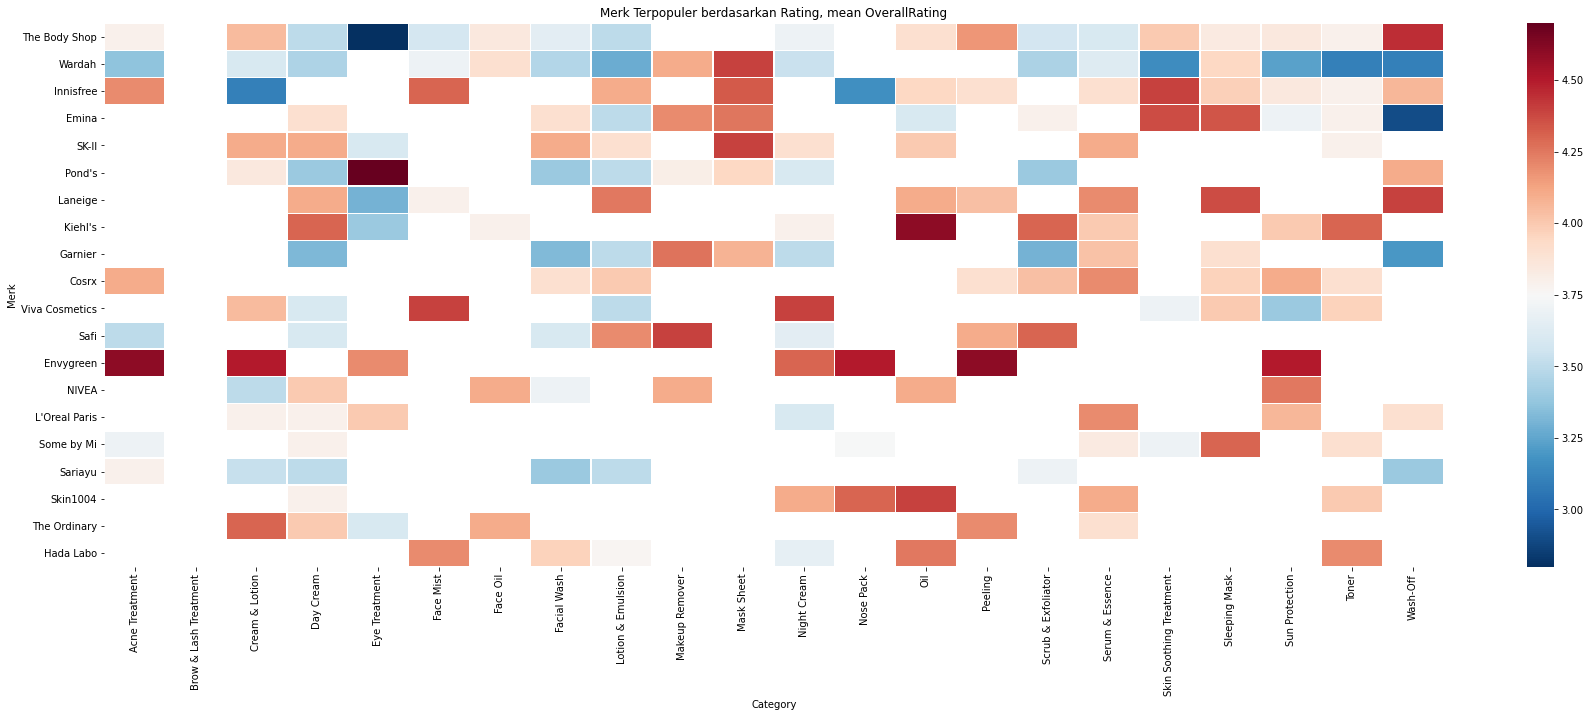

In [ ]:
## What about quality(rating)
## Look at goodsflow
flow = pd.crosstab(
    df1['Merk'],
    df1['Category'],
    df1['OverallRating'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[30,10])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Merk Terpopuler berdasarkan Rating, mean OverallRating')

Text(0.5, 1.0, 'Merk Terpopuler berdasarkan Rating, mean OverallRating')

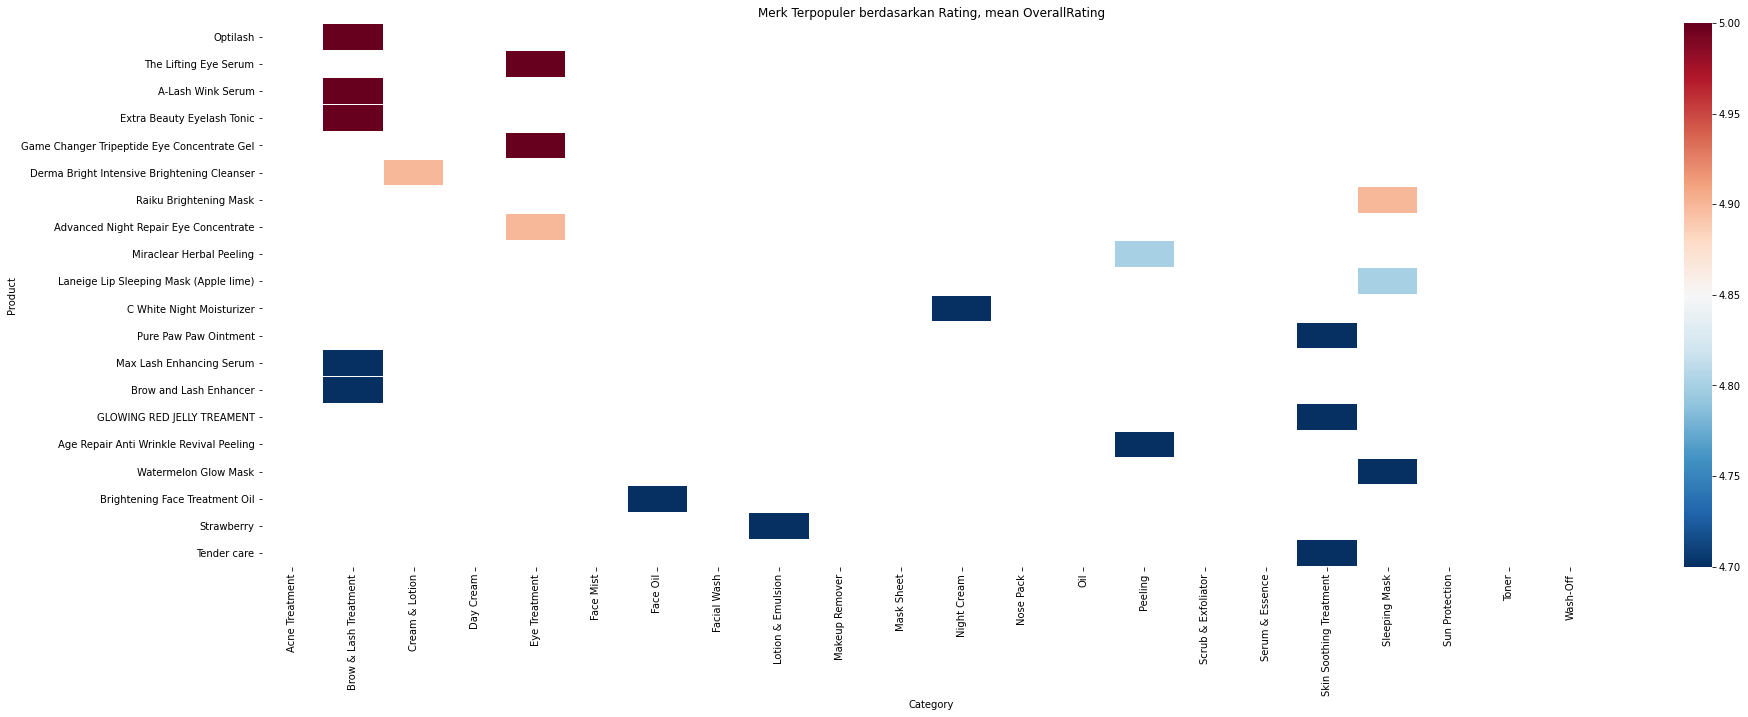

In [ ]:
## What about quality(rating)
## Look at goodsflow
flow = pd.crosstab(
    df1['Product'],
    df1['Category'],
    df1['OverallRating'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[30,10])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Product Terpopuler berdasarkan Rating, mean OverallRating')

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

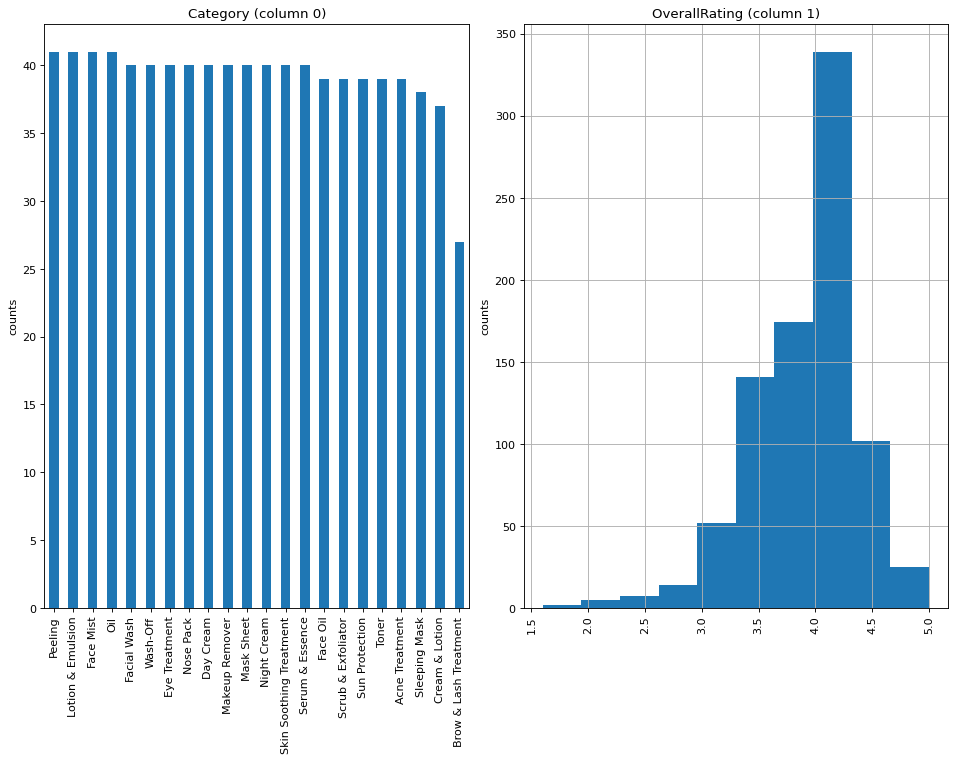

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

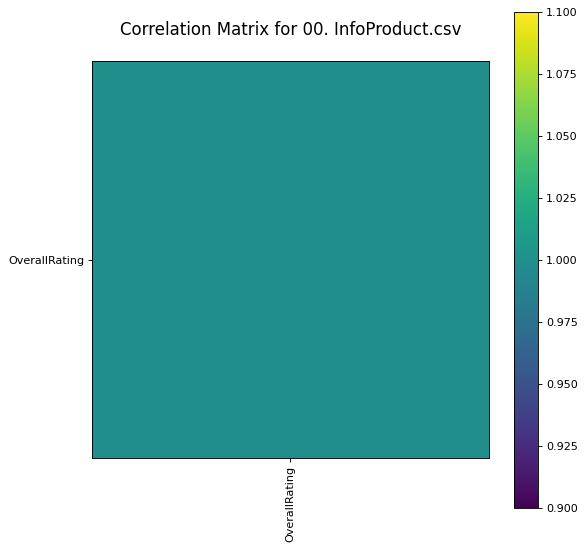

In [ ]:
plotCorrelationMatrix(df1, 8)


# Rating

In [ ]:
df1['OverallRating'].describe()

count    861.000000
mean       3.916841
std        0.479105
min        1.600000
25%        3.600000
50%        4.000000
75%        4.300000
max        5.000000
Name: OverallRating, dtype: float64

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

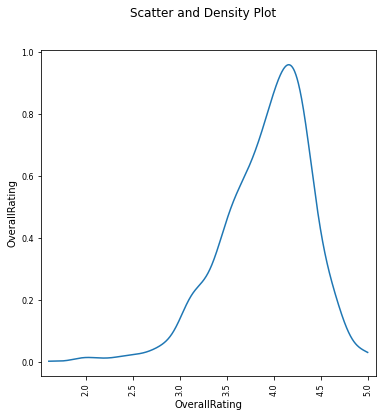

In [ ]:
plotScatterMatrix(df1, 6, 15)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

Text(0.5, 1.0, 'Distribution of Rating')

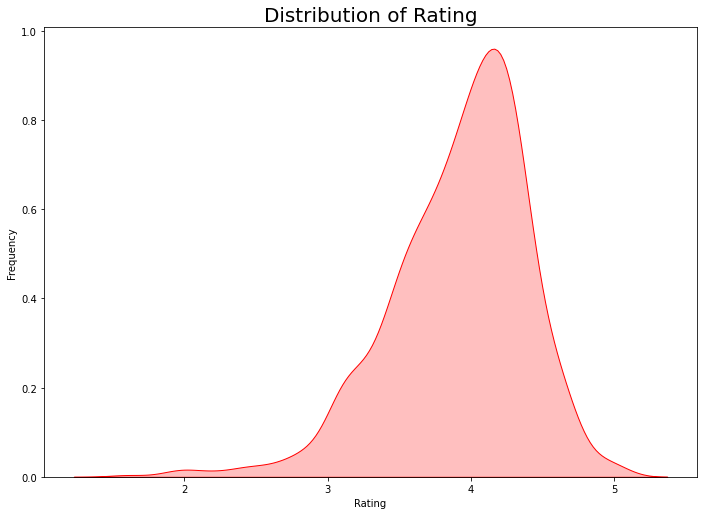

In [ ]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df1.OverallRating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Average of rating of application in skincare is around 4 which is very high

## Category

In [ ]:
print( len(df1['Category'].unique()) , "categories")

print("\n", df1['Category'].unique())

22 categories

 ['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Eye Treatment' 'Brow & Lash Treatment'
 'Skin Soothing Treatment' 'Acne Treatment' 'Serum & Essence' 'Peeling'
 'Sleeping Mask' 'Mask Sheet' 'Nose Pack' 'Wash-Off' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


Text(0.5, 1.0, 'Count of SkinCare in each category')

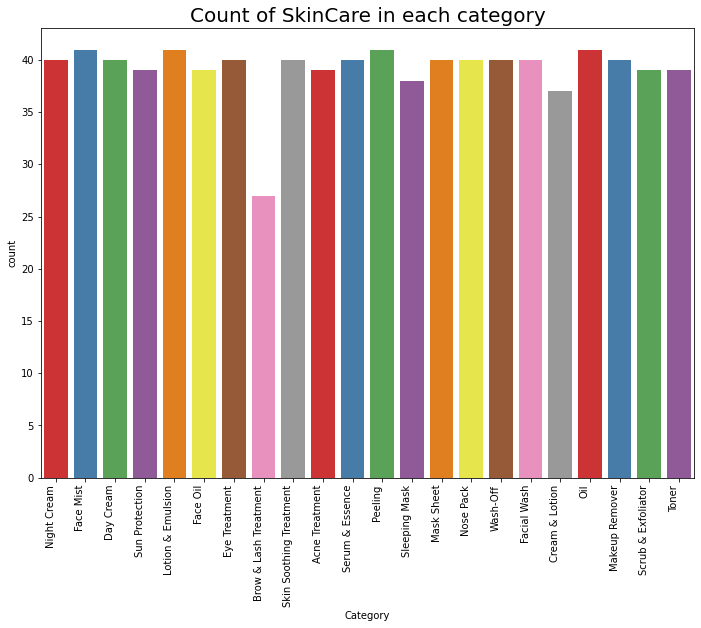

In [ ]:
g = sns.countplot(x="Category",data=df1, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of SkinCare in each category',size = 20)

Oil, Peeling and Lotion & Emultion category are the most appearances for skinCare

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

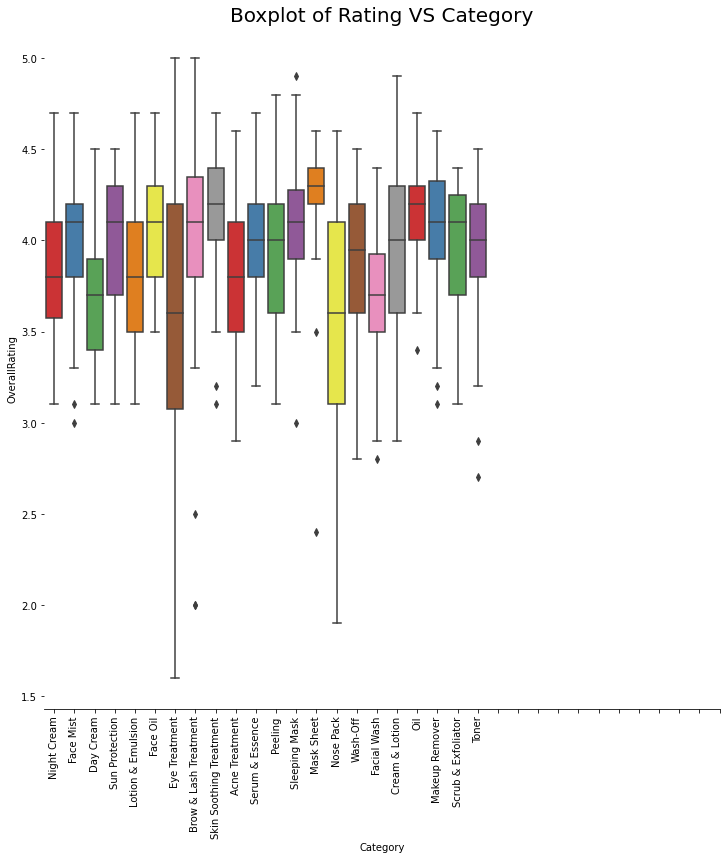

In [ ]:
g = sns.catplot(x="Category",y="OverallRating",data=df1, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("OverallRating")
plt.title('Boxplot of Rating VS Category',size = 20)

Rating of SkinCare in each category is not different too much but ada beberapa data outlier tetapi tidak terlalu berpengaruh




# Price

In [ ]:
df1['Price'].value_counts().head(30)

Rp. 0          55
Rp. 150.000    18
Rp. 25.000     18
Rp. 50.000     17
Rp. 30.000     16
Rp. 15.000     15
Rp. 20.000     14
Rp. 28.000     13
Rp. 10.000     13
Rp. 35.000     11
Rp. 100.000    11
Rp. 55.000     10
Rp. 40.000     10
Rp. 250.000    10
Rp. 75.000      9
Rp. 19.000      9
Rp. 70.000      9
Rp. 27.000      8
Rp. 180.000     8
Rp. 22.000      7
Rp. 190.000     7
Rp. 400.000     7
Rp. 240.000     7
Rp. 130.000     7
Rp. 21.000      6
Rp. 6.400       6
Rp. 95.000      6
Rp. 49.000      6
Rp. 23.000      6
Rp. 300.000     6
Name: Price, dtype: int64

In [ ]:
df1['Price'].describe()

In [ ]:
df1[df1['Price'] == 1000]

# Dataset Review

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 00. Review.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../content/00. Review.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '00. Review.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


Data Still in object type, we need to convert to int

In [ ]:
df2.head(10)

,Product,UserName,SkinCond_Age,Recommend,PostDate,Review,Rating
0,Perfect 3D Gel,MALA_,35 - 39,MALA_ recommends this product!,12 Jul 2020,Di aku beneran kerja. Melembabkan bgt. Tp gak ...,5
1,Perfect 3D Gel,Vitamaylinda,"Normal, 19 - 24",Vitamaylinda doesn't recommend this product!,31 May 2020,ga cocok bgttt bikin muka bruntusan dan lgsg m...,2
2,Perfect 3D Gel,aishdwie,"Combination, 19 - 24",aishdwie doesn't recommend this product!,30 Jul 2020,[SOLD]baru pertama kali nyoba dan beli karna l...,2
3,Perfect 3D Gel,ilmisaptiah,"Dry, 30 - 34",ilmisaptiah doesn't recommend this product!,12 Jul 2020,"enak sih di mukaku, yg tadinya kering jd lemba...",3
4,Perfect 3D Gel,alvinadin,"Oily, 19 - 24",alvinadin recommends this product!,15 Jul 2020,"SOLD OUT [PRELOVED] Halo aku preloved ini ya, ...",3
5,Perfect 3D Gel,ellenDeLouise,"Oily, 30 - 34",ellenDeLouise recommends this product!,19 Jul 2020,awalnya sih pas udah beli pembersih Hada Labo ...,5
6,Perfect 3D Gel,Arfanisa,"Dry, 25 - 29",Arfanisa recommends this product!,20 Jul 2020,"1. gel nya ga lengket, cepet meresap, tapi set...",4
7,Perfect 3D Gel,Mangkawani,"Oily, 25 - 29",Mangkawani doesn't recommend this product!,02 Jul 2020,tekstur dari produk ini tuh kayak jelly yang d...,2
8,Perfect 3D Gel,neniandita,"Combination, 35 - 39",neniandita recommends this product!,26 Jul 2020,bagusss... teksturnya unik gel bening gt yg kl...,4
9,Perfect 3D Gel,dyahfebri,"Combination, 19 - 24",dyahfebri recommends this product!,30 Aug 2020,Ini harusnya jadi moisturizer kesayangan oily ...,4


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       861 non-null    object 
 1   Merk           861 non-null    object 
 2   Product        861 non-null    object 
 3   Price          856 non-null    object 
 4   OverallRating  861 non-null    float64
 5   Reviewer       858 non-null    float64
dtypes: float64(2), object(4)
memory usage: 40.5+ KB


In [ ]:
df2['Review'].head()

0    Di aku beneran kerja. Melembabkan bgt. Tp gak ...
1    ga cocok bgttt bikin muka bruntusan dan lgsg m...
2    [SOLD]baru pertama kali nyoba dan beli karna l...
3    enak sih di mukaku, yg tadinya kering jd lemba...
4    SOLD OUT [PRELOVED] Halo aku preloved ini ya, ...
Name: Review, dtype: object

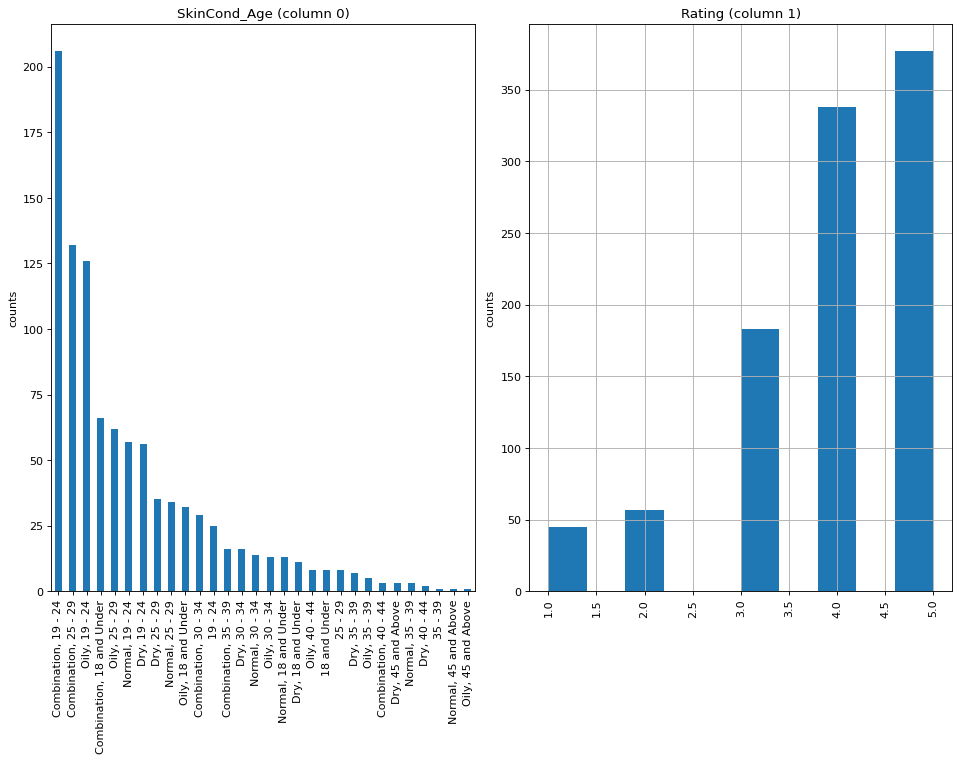

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

In [ ]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Price,5,0.005807
Reviewer,3,0.003484
OverallRating,0,0.000000
Product,0,0.000000
Merk,0,0.000000
Category,0,0.000000


In [ ]:
df1.dropna(how ='any', inplace = True)

In [ ]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Reviewer,0,0.0
OverallRating,0,0.0
Price,0,0.0
Product,0,0.0
Merk,0,0.0
Category,0,0.0


In [ ]:
print(df1.shape)

(853, 6)


In [ ]:
print( len(df1['Category'].unique()) , "categories")

print("\n", df1['Category'].unique())

22 categories

 ['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Eye Treatment' 'Brow & Lash Treatment'
 'Skin Soothing Treatment' 'Acne Treatment' 'Serum & Essence' 'Peeling'
 'Sleeping Mask' 'Mask Sheet' 'Nose Pack' 'Wash-Off' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


Text(0.5, 1.0, 'Count of Skin in each category')

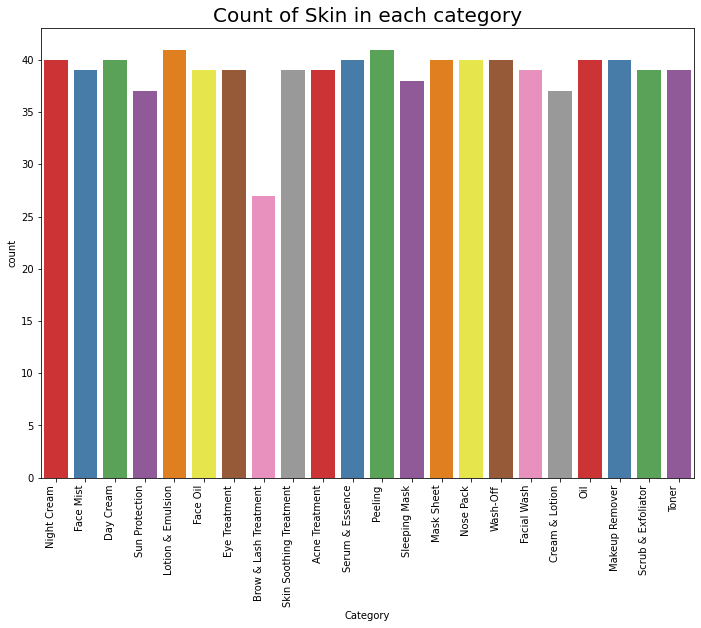

In [ ]:
g = sns.countplot(x="Category",data=df1, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of Skin in each category',size = 20)

In [ ]:
df1[df1.Reviewer > 5000].head(10)

,Category,Merk,Product,Price,OverallRating,Reviewer
102,Sun Protection,Skin Aqua,UV Moisture Milk,Rp. 48.500,4.2,5925.0
103,Sun Protection,Wardah,Sunscreen Gel SPF 30,Rp. 28.000,3.1,5891.0
104,Sun Protection,Biore,UV Aqua Rich Watery Essence SPF 50+/PA++++,Rp. 140.000,4.3,5655.0
289,Sleeping Mask,Laneige,Water Sleeping Mask,Rp. 380.000,4.2,5821.0
445,Makeup Remover,Garnier,Micellar Cleansing Water All-in-1 Makeup Remov...,Rp. 50.000,4.3,9312.0


<Figure size 1440x720 with 0 Axes>

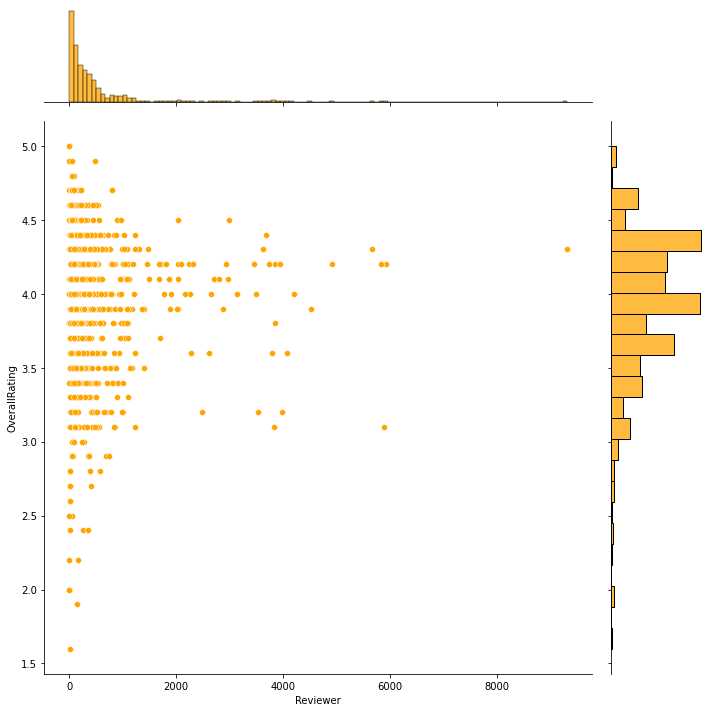

In [ ]:
plt.figure(figsize = (20,10))
g = sns.jointplot(x="Reviewer", y="OverallRating",color = 'orange', data=df1,size = 10);

Text(0.5, 1.0, 'Rating VS Reveiws')

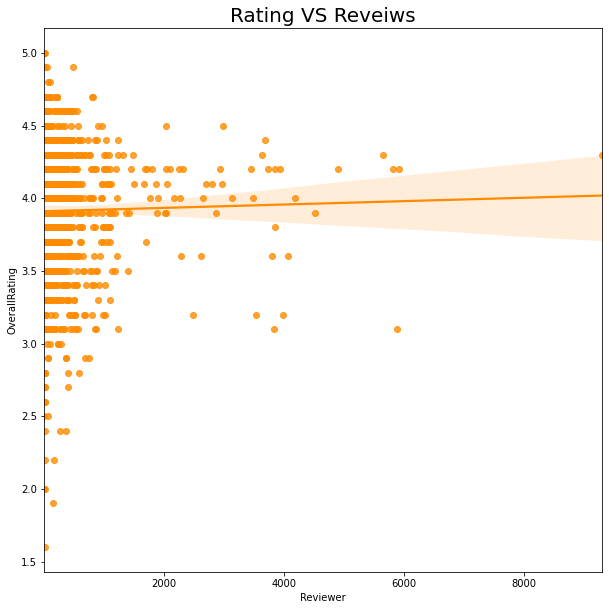

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviewer", y="OverallRating", color = 'darkorange',data=df1[df1['Reviewer']<1000000]);
plt.title('Rating VS Reveiws',size = 20)